In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'IPAPGothic'
plt.rcParams['font.size'] = 18

xをベクトルとしたとき、確率分布p(x)に対してある関数f(x)の期待値は、以下のように表せる
$$
\langle f\bigl( \mathbf{x} \bigr) \rangle_{p\bigl( \mathbf{x} \bigr)} = \int f\bigl( \mathbf{x} \bigr) p\bigl( \mathbf{x} \bigr) d\mathbf{x}
$$

これはxの関数ではなく確率分布p(x)の関数である事に注意

In [2]:
# 離散分布における期待値
def expected_value(values, probabilities):
    '''
    離散分布の期待値
    values: 取りうる値を格納した1次元np.array
    probabilities: 取りうる値に対する確率を格納した1次元np.array
    '''
    expected_value = np.sum(values * probabilities)
    return expected_value

In [3]:
v = np.array([1,2])

In [4]:
px = np.array([1/3, 2/3])

In [5]:
expected_value(v, px)

1.6666666666666665

エントロピー
$$
\begin{split}
H\bigl[ p\bigl( \mathbf{x} \bigr) \bigr] &= - \int p\bigl( \mathbf{x} \bigr) \ln{p\bigl( \mathbf{x} \bigr)} d\mathbf{x} \\
&= - \langle \ln{p}\bigl( \mathbf{x} \bigr) \rangle_{p\bigl( \mathbf{x} \bigr)}
\end{split}
$$
これは確率分布の乱雑さを示す  
個々のxに対する確率p(x)が均一であれば、ln(p(x))の平均は大きくなるし、逆なら逆になる

In [6]:
# 離散分布におけるエントロピー
def entropy(px):
    '''
    離散分布のエントロピー
    px: 1次元のarray、全ての取りうる値に対する確率を格納
    '''
    entropy = - np.sum(px * np.log(px))
    return entropy

In [7]:
entropy(px)

0.63651416829481278

KLダイバージェンス
$$
\begin{split}
  KL\bigl[ p\bigl( \mathbf{x} \bigr) \parallel q\bigl( \mathbf{x} \bigr) \bigr] &= \int p\bigl( \mathbf{x} \bigr) \ln \frac{p\bigl( \mathbf{x} \bigr)}{q\bigl( \mathbf{x} \bigr)} d\mathbf{x} \\
  &= \langle \ln p\bigl( \mathbf{x} \bigr) \rangle_{p\bigl( \mathbf{x} \bigr)} - \langle \ln q\bigl( \mathbf{x} \bigr) \rangle_{p\bigl( \mathbf{x} \bigr)}
\end{split}
$$

In [8]:
# 離散分布におけるKLダイバージェンス
def kl_divergence(px, qx):
    '''
    2つの離散分布におけるKLダイバージェンスを求める
    px, qx: 全ての取り得る値に対する確率を格納した1次元のarray
    '''
    kl_divergence = np.sum(px * np.log(px / qx))
    return kl_divergence

In [9]:
qx = np.array([1/4, 3/4])

In [10]:
kl_divergence(px, qx)

0.017372000379671279

In [11]:
kl_divergence(qx, px)

0.01641675862934236

サンプリングによる期待値の近似計算  
$$
\langle f\bigl( \mathbf{x} \bigr) \rangle_{p\bigl( \mathbf{x} \bigr)} \approx \frac{1}{L} \sum_{l=1}^{L} f\bigl( \mathbf{x} \bigr) d\mathbf{x}
$$

要するに確率分布pxの関数をpxから取り出したxによる計算で近似出来ますよというお話  
サンプリング結果xから確率分布pxを近似的に求めれば、後は今まで通り確率分布pxの関数を解いてあげれば良い

確率分布

ベルヌーイ分布  
2値{0, 1}をとるxの個数は、[0, 1]のパラメータμを用いて
$$
Bern\bigl(x \mid \mu \bigr) = \mu^{x} \bigl( 1 - \mu \bigr)^{1 - x}
$$
と表される。  

x, x^2の期待値は、それぞれ
$$
\begin{align}
  \langle x \rangle = \mu \\
  \langle x^2 \rangle = \mu
\end{align}
$$
となる

試しに、ベルヌーイ分布のパラメータμを変えながらエントロピーH[p(x)]を描画する

In [12]:
from numpy.random import binomial

In [13]:
binomial(1, 0.7, 10)

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [14]:
x_list = np.arange(0.0001, 0.9999, 0.0001)
px_list = [[i, 1-i] for i in x_list]
ent_list = [entropy(np.array(px)) for px in px_list]

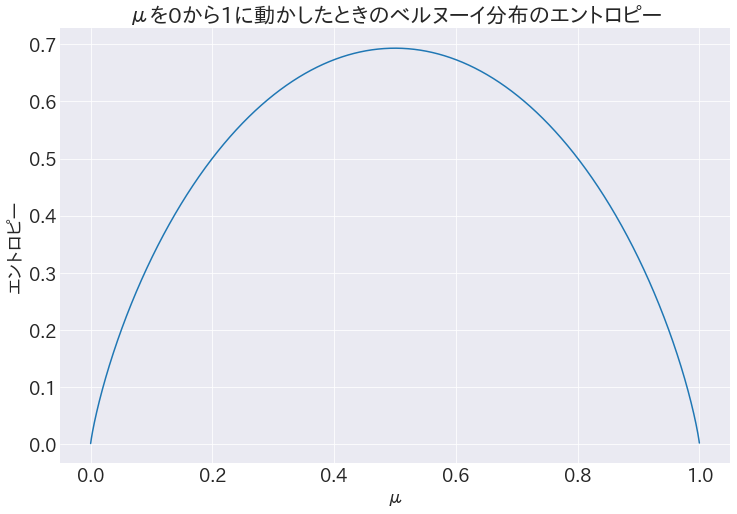

In [15]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(x_list, ent_list)

ax.set_title('μを0から1に動かしたときのベルヌーイ分布のエントロピー')
ax.set_xlabel('μ')
ax.set_ylabel('エントロピー')
plt.show()

二項分布
$$
Bin(m | M, \mu) = {}_M C_m \mu^m (M - \mu)^{(M - \mu)}
$$
m, m^2の期待値はそれぞれ
$$
\begin{align}
  \langle m \rangle = M\mu \\
  \langle m^2 \rangle = M\mu{(M-1)\mu+1}
\end{align}
$$

ベータ分布をBokehにスライドバーつけてグリグリ動かす

In [17]:
from bokeh.layouts import row, widgetbox
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource

x = np.linspace(0, 10, 500)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-10, 10), plot_width=400, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var A = amp.value;
    var k = freq.value;
    var phi = phase.value;
    var B = offset.value;
    x = data['x']
    y = data['y']
    for (i = 0; i < x.length; i++) {
        y[i] = B + A*Math.sin(k*x[i]+phi);
    }
    source.change.emit();
""")

amp_slider = Slider(start=0.1, end=10, value=1, step=.1,
                    title="Amplitude", callback=callback)
callback.args["amp"] = amp_slider

freq_slider = Slider(start=0.1, end=10, value=1, step=.1,
                     title="Frequency", callback=callback)
callback.args["freq"] = freq_slider

phase_slider = Slider(start=0, end=6.4, value=0, step=.1,
                      title="Phase", callback=callback)
callback.args["phase"] = phase_slider

offset_slider = Slider(start=-5, end=5, value=0, step=.1,
                       title="Offset", callback=callback)
callback.args["offset"] = offset_slider

layout = row(
    plot,
    widgetbox(amp_slider, freq_slider, phase_slider, offset_slider),
)

output_file("slider.html", title="slider.py example")

show(layout)